# Number of Fused Rings in Fused ladder NFA cores

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
import seaborn as sns
import numpy as np

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title
sns.set_style("white")

Import dataset only containing fused ladder NFAs. Contains Murcko scaffold data

In [3]:
df = pd.read_csv("OPEP3_fused_rings.csv")
print(f"The length of this dataset is {len(df)}")
unique_cores = pd.unique(df["core_type"])
n_unique = len(unique_cores)
print(f"The number of unique cores is {n_unique}")

The length of this dataset is 1014
The number of unique cores is 75


Examine the lengths of the cores in this dataset

In [4]:
lengths = []
for x in unique_cores:
    if len(x) not in lengths:
        lengths.append(len(x))

lengths.sort()
print(lengths)

[4, 5, 6, 7, 8, 9, 10, 11, 12]


Divide dataset into lists of each size

In [5]:
length_4 = []
length_5 = []
length_6 = []
length_7 = []
length_8 = []
length_9 = []
length_10 = []
length_11 = []
length_12 = []
lengths = []

for x in range(len(df["core_type"])):
    length = len(df["core_type"][x])
    lengths.append(length)
    
    if length == 4:
        length_4.append(df["PCE_avg"][x])
    elif length == 5:
        length_5.append(df["PCE_avg"][x])
    elif length == 6:
        length_6.append(df["PCE_avg"][x])
    elif length == 7:
        length_7.append(df["PCE_avg"][x])
    elif length == 8:
        length_8.append(df["PCE_avg"][x])
    elif length == 9:
        length_9.append(df["PCE_avg"][x])
    elif length == 10:
        length_10.append(df["PCE_avg"][x])
    elif length == 11:
        length_11.append(df["PCE_avg"][x])
    elif length == 12:
        length_12.append(df["PCE_avg"][x])

df["core_length"] = lengths

Plot the distribution of each length

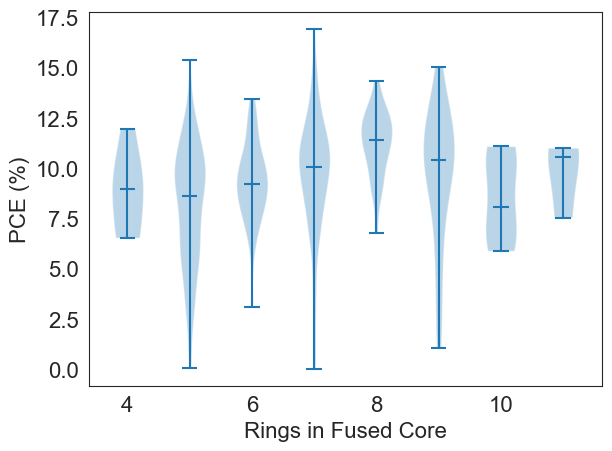

In [6]:
# organize data
fused_rings = [length_4, length_5, length_6, length_7, length_8, length_9, length_10, length_11]
positions = [4, 5, 6, 7, 8, 9, 10, 11]

# plot data
fig, ax = plt.subplots()

plt.violinplot(fused_rings, positions, showmedians = True)

ax.set_ylabel('PCE (%)')
ax.set_xlabel('Rings in Fused Core')

plt.tight_layout()

#plt.savefig('num_fused_rings_violins.pdf', dpi=600)
plt.savefig('num_fused_rings_violins.png', dpi=600)

plt.show()

By looking at the medians, 8 cores seems to perform the best. We can perform ANOVA to see if there is a statistical difference.

In [7]:
# generate model for linear regression
my_model = smf.ols(formula='PCE_avg ~ core_length', data=df)
# fit model 
my_model_fit = my_model.fit()

print(my_model_fit.summary())

anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                PCE_avg   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     47.35
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.04e-11
Time:                        11:30:29   Log-Likelihood:                -2547.0
No. Observations:                1014   AIC:                             5098.
Df Residuals:                    1012   BIC:                             5108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6594      0.523     10.827      

Another way of doing it

In [8]:
f_oneway(length_4, length_5, length_6, length_7, length_8, length_9, length_10, length_11)

F_onewayResult(statistic=10.708570408632374, pvalue=4.66410230426355e-13)

p < 0.05 so the difference in number of fused cores is significant!

We can try Tukey's test to see pairwise comparisons and see which size is different

In [9]:
tukey = pairwise_tukeyhsd(endog=df['PCE_avg'], groups = df["core_length"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     4      5  -0.6912 0.9997  -4.4817  3.0992  False
     4      6   0.4719    1.0  -3.5402   4.484  False
     4      7   0.7502 0.9995  -3.0228  4.5232  False
     4      8   2.4328  0.607  -1.5269  6.3925  False
     4      9   0.7843 0.9996  -3.2339  4.8026  False
     4     10  -0.2661    1.0  -5.1112  4.5789  False
     4     11   0.8883    1.0   -5.612  7.3887  False
     4     12   0.3917    1.0  -9.5378 10.3211  False
     5      6   1.1631 0.2922  -0.3517   2.678  False
     5      7   1.4414    0.0    0.783  2.0999   True
     5      8    3.124    0.0    1.754  4.4941   True
     5      9   1.4756 0.0691  -0.0554  3.0065  False
     5     10   0.4251    1.0  -2.6849  3.5352  False
     5     11   1.5796 0.9918  -3.7545  6.9136  False
     5     12   1.0829    1.0  -8.1253 10.2911  False
     6      7   0.2783 0.999

Tukey's test shows that there are only a few statistical differences, which are between 5 & 7, 5 & 8, 6 & 8, and 7 & 8.

What are the average differences in PCE between these?

In [10]:
fused_rings = [length_4, length_5, length_6, length_7, length_8, length_9, length_10, length_11]

length_5_mean_PCE = np.average(length_5)
length_6_mean_PCE = np.average(length_6)
length_7_mean_PCE = np.average(length_7)
length_8_mean_PCE = np.average(length_8)

print(f"The average difference in PCE between 5 and 7 rings is: {length_7_mean_PCE-length_5_mean_PCE}")
print(f"The average difference in PCE between 5 and 8 rings is: {length_8_mean_PCE-length_5_mean_PCE}")
print(f"The average difference in PCE between 6 and 8 rings is: {length_8_mean_PCE-length_6_mean_PCE}")
print(f"The average difference in PCE between 7 and 8 rings is: {length_8_mean_PCE-length_7_mean_PCE}")

The average difference in PCE between 5 and 7 rings is: 1.441427556139514
The average difference in PCE between 5 and 8 rings is: 3.1240417744683526
The average difference in PCE between 6 and 8 rings is: 1.9608939802335996
The average difference in PCE between 7 and 8 rings is: 1.6826142183288386


For 4 rings, there are 6 NFAs
For 5 rings, there are 299 NFAs
For 6 rings, there are 42 NFAs
For 7 rings, there are 560 NFAs
For 8 rings, there are 53 NFAs
For 9 rings, there are 41 NFAs
For 10 rings, there are 9 NFAs
For 11 rings, there are 3 NFAs


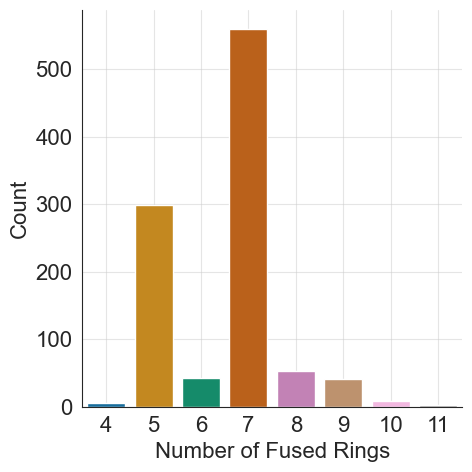

In [11]:
fused_ring_length_count = []
i = 4
for x in fused_rings:
    print(f"For {i} rings, there are {len(x)} NFAs")
    fused_ring_length_count.append(len(x))
    i +=1

data = {'Fused_rings': positions, 'count': fused_ring_length_count}
data_df = pd.DataFrame(data)

sns.catplot(data = data_df, x = "Fused_rings", y="count", kind="bar", palette="colorblind")

plt.xlabel("Number of Fused Rings")
plt.ylabel("Count")
plt.grid(alpha=0.5)
plt.tight_layout()

#plt.savefig('fused_ring_count_barplot.pdf', dpi=600)
plt.savefig('fused_ring_count_barplot.png', dpi=600)

plt.show()